In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('loan.csv')
print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
for i in df.columns:
    df[i].fillna(df[i].mode()[0], inplace = True)

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

For my visualization purpose i took data into categorical and numerical

In [12]:
numeric_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,120.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [13]:
categorical_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [14]:
for col in categorical_data:
    print('\n%s column: '%col)
    print(df[col].value_counts())


Loan_ID column: 
LP001760    1
LP001734    1
LP001585    1
LP002130    1
LP002435    1
           ..
LP002984    1
LP002626    1
LP001325    1
LP001018    1
LP001136    1
Name: Loan_ID, Length: 614, dtype: int64

Gender column: 
Male      502
Female    112
Name: Gender, dtype: int64

Married column: 
Yes    401
No     213
Name: Married, dtype: int64

Dependents column: 
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Education column: 
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self_Employed column: 
No     532
Yes     82
Name: Self_Employed, dtype: int64

Property_Area column: 
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Loan_Status column: 
Y    422
N    192
Name: Loan_Status, dtype: int64


In [15]:
categorical_data=categorical_data.drop(['Loan_ID'],axis=1)

In [16]:
for col in numeric_data:
    print('\n%s column: '%col)
    print(df[col].value_counts())


ApplicantIncome column: 
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

CoapplicantIncome column: 
0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

LoanAmount column: 
120.0    42
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

Loan_Amount_Term column: 
360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Credit_History column: 
1.0    525
0.0     89
Name: Credit_History, dtype: int64


In [17]:
categorical_data.isnull().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

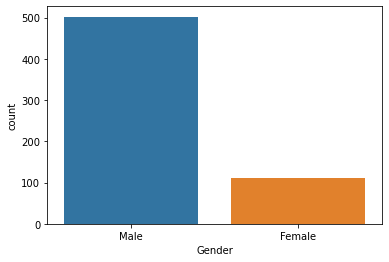

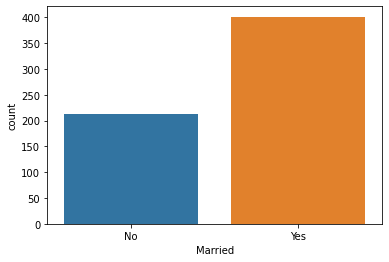

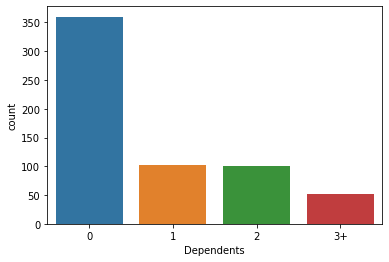

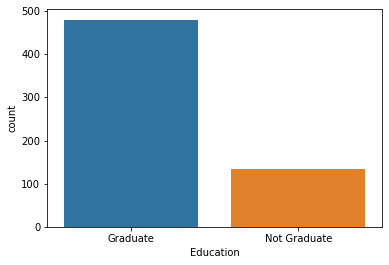

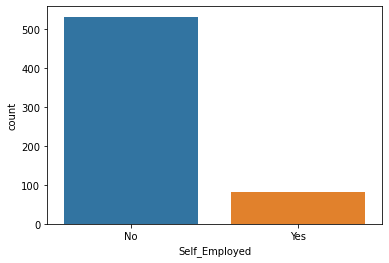

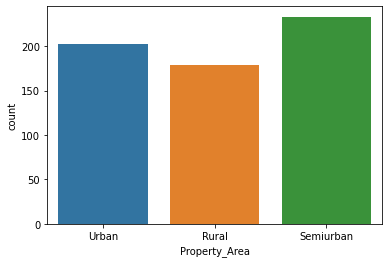

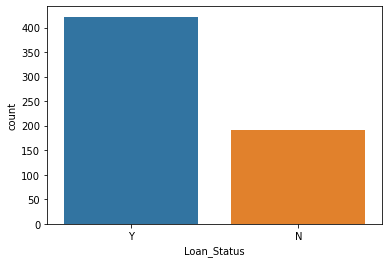

In [18]:
for i in categorical_data.columns:
    plt.figure()
    sns.countplot(x=categorical_data[i],data=categorical_data)


1.As per categorical Analysis Male are more compare to female
2.As per Martial Status Mostly they are single
3.Dependents are 0 are more and next almost 2 dependents will be there
4.For loan approval mostly Graduates are there 
5.Mostly All are Employed
6.Semiurban people are more


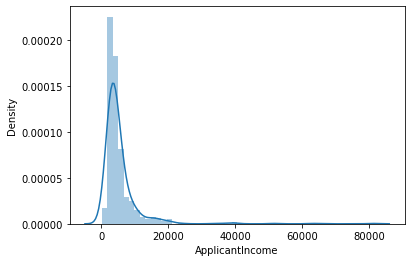

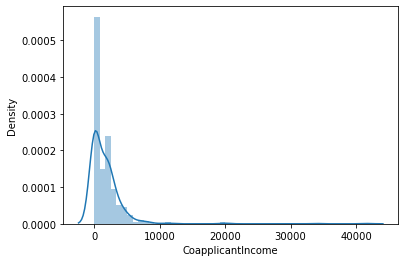

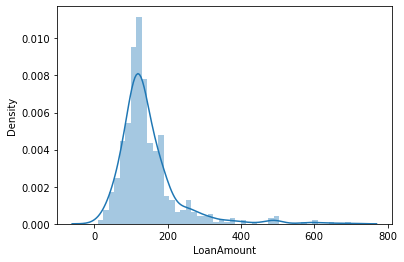

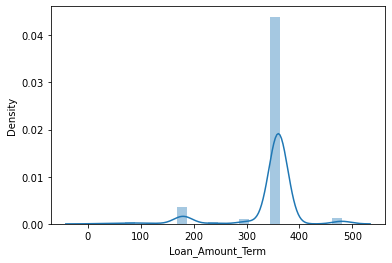

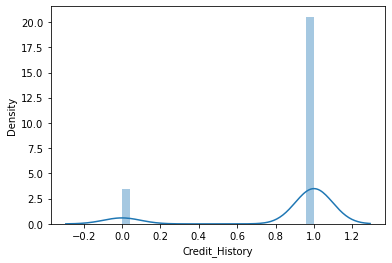

In [19]:
for i in numeric_data.columns:
    plt.figure()
    sns.distplot(numeric_data[i])

In [20]:
df1 = pd.concat([numeric_data,categorical_data], axis=1)
df1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849,0.0,120.0,360.0,1.0,Male,No,0,Graduate,No,Urban,Y
1,4583,1508.0,128.0,360.0,1.0,Male,Yes,1,Graduate,No,Rural,N
2,3000,0.0,66.0,360.0,1.0,Male,Yes,0,Graduate,Yes,Urban,Y
3,2583,2358.0,120.0,360.0,1.0,Male,Yes,0,Not Graduate,No,Urban,Y
4,6000,0.0,141.0,360.0,1.0,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,Female,No,0,Graduate,No,Rural,Y
610,4106,0.0,40.0,180.0,1.0,Male,Yes,3+,Graduate,No,Rural,Y
611,8072,240.0,253.0,360.0,1.0,Male,Yes,1,Graduate,No,Urban,Y
612,7583,0.0,187.0,360.0,1.0,Male,Yes,2,Graduate,No,Urban,Y


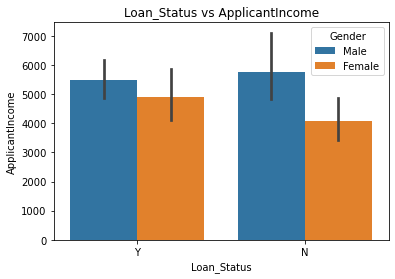

In [21]:
sns.barplot(x="Loan_Status", y="ApplicantIncome", hue="Gender", data=df1)
plt.title("Loan_Status vs ApplicantIncome")
plt.show()

 As per the Gender Male whose income upto 5500 and female income salary is 5000

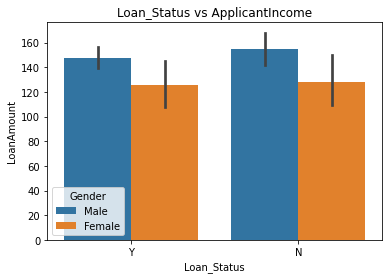

In [22]:
sns.barplot(x="Loan_Status", y="LoanAmount", hue="Gender", data=df1)
plt.title("Loan_Status vs ApplicantIncome")
plt.show()

Maximum Loan Amount for male is 145 they are approving
Loan Amount of 150 also for male is not approving because of other variables

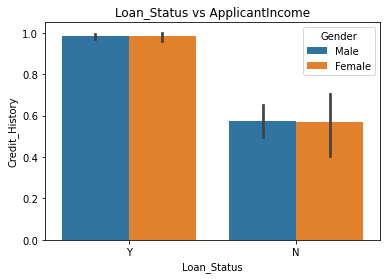

In [23]:
sns.barplot(x="Loan_Status", y="Credit_History", hue="Gender", data=df1)
plt.title("Loan_Status vs ApplicantIncome")
plt.show()

Almost Credit History of 1.0 for both male and female 
for not approving loan for both male and female less than 1

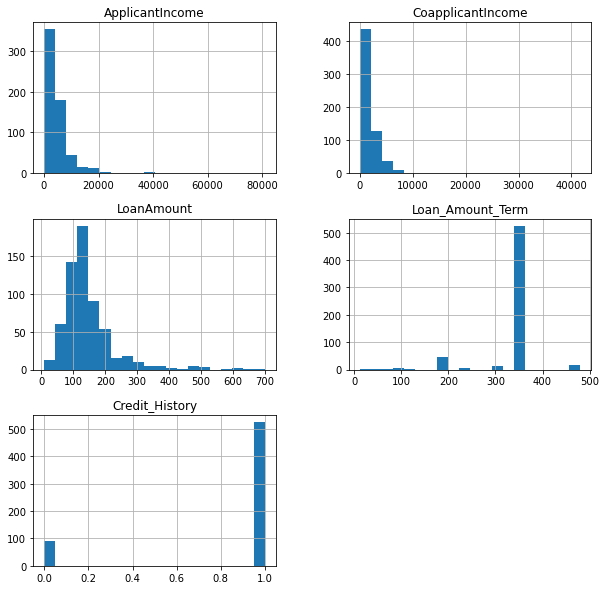

In [24]:
df1.hist(bins=20,figsize=(10,10))
plt.show()

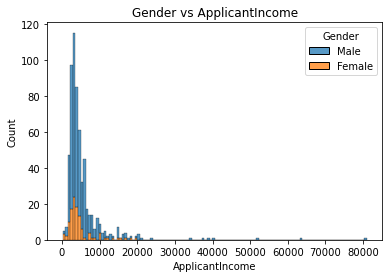

In [25]:
sns.histplot(x="ApplicantIncome",hue="Gender",data=df1,stat="count", multiple="stack")
plt.title("Gender vs ApplicantIncome")
plt.show()

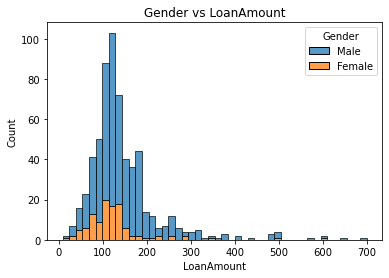

In [26]:
sns.histplot(x="LoanAmount",hue="Gender",data=df1,stat="count", multiple="stack")
plt.title("Gender vs LoanAmount")
plt.show()

Maximum Loan amount is 120

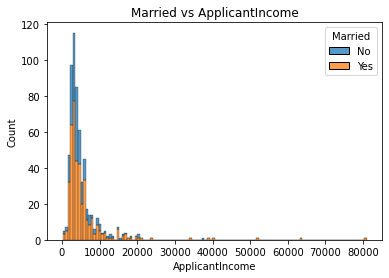

In [27]:
sns.histplot(x="ApplicantIncome",hue="Married",data=df1,stat="count", multiple="stack")
plt.title("Married vs ApplicantIncome")
plt.show()

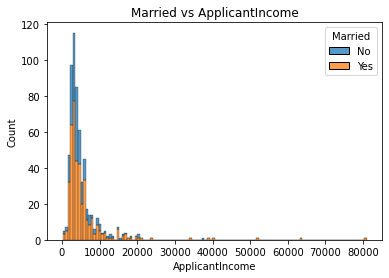

In [28]:
sns.histplot(x="ApplicantIncome",hue="Married",data=df1,stat="count", multiple="stack")
plt.title("Married vs ApplicantIncome")
plt.show()

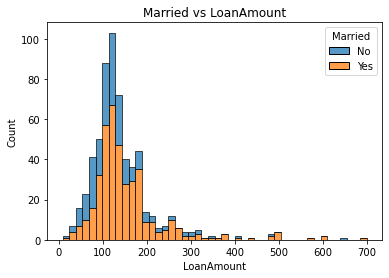

In [29]:
sns.histplot(x="LoanAmount",hue="Married",data=df1,stat="count", multiple="stack")
plt.title("Married vs LoanAmount")
plt.show()

In [30]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [31]:
for i in df1.columns:
    df1[i]=le.fit_transform(df1[i])
    df1

In [32]:
df1.describe(include='all')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,247.117264,78.884365,86.410423,7.667752,0.855049,0.817590,0.653094,0.744300,0.218241,0.133550,1.037459,0.687296
std,143.537853,92.623999,45.292390,1.109224,0.352339,0.386497,0.476373,1.009623,0.413389,0.340446,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.250000,0.000000,53.250000,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,244.500000,33.500000,78.000000,8.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,369.750000,153.750000,115.750000,8.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,504.000000,286.000000,202.000000,9.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000


In [33]:
df1.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
ApplicantIncome,1.000000,-0.248763,0.525367,-0.017972,0.037980,0.074223,0.010497,0.137382,-0.190873,0.199142,-0.065143,-0.003123
CoapplicantIncome,-0.248763,1.000000,0.268146,-0.015633,-0.006363,0.180774,0.207905,-0.065140,-0.052724,-0.036033,-0.082223,0.007812
LoanAmount,0.525367,0.268146,1.000000,0.060160,0.001587,0.148262,0.183456,0.161335,-0.176956,0.117258,-0.089163,-0.040926
Loan_Amount_Term,-0.017972,-0.015633,0.060160,1.000000,-0.002379,-0.065494,-0.082642,-0.096377,-0.076414,-0.029184,-0.086578,-0.005679
Credit_History,0.037980,-0.006363,0.001587,-0.002379,1.000000,0.009170,0.010938,-0.040160,-0.073658,-0.001550,0.001963,0.540556
Gender,0.074223,0.180774,0.148262,-0.065494,0.009170,1.000000,0.364569,0.172914,0.045364,-0.000525,-0.025752,0.017987
Married,0.010497,0.207905,0.183456,-0.082642,0.010938,0.364569,1.000000,0.334216,0.012304,0.004489,0.004257,0.091478
Dependents,0.137382,-0.065140,0.161335,-0.096377,-0.040160,0.172914,0.334216,1.000000,0.055752,0.056798,-0.000244,0.010118
Education,-0.190873,-0.052724,-0.176956,-0.076414,-0.073658,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.065243,-0.085884
Self_Employed,0.199142,-0.036033,0.117258,-0.029184,-0.001550,-0.000525,0.004489,0.056798,-0.010383,1.000000,-0.030860,-0.003700


<AxesSubplot:>

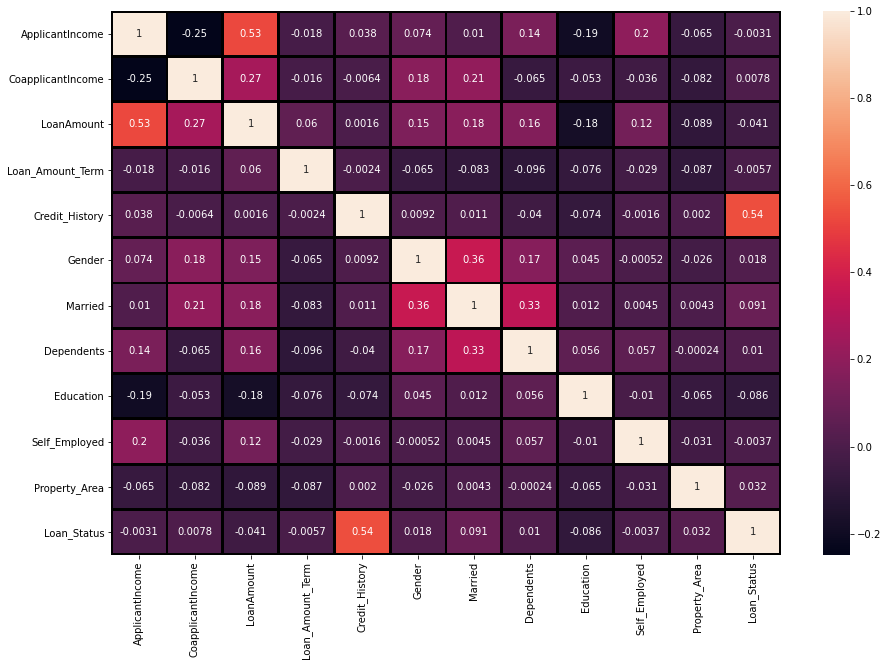

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True,linewidth=2.0,linecolor='black')

for Loan_status the credit_history has positive correlation
married and gender,Dependents and Married are multi collinear but not effectively

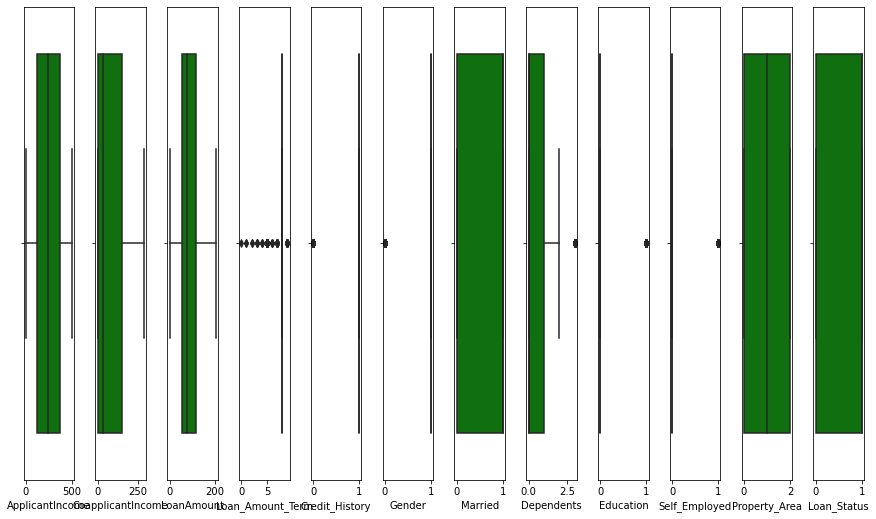

In [35]:
collist=df1.columns.values
ncol=20
nrows=14
plt.figure(figsize=(ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df1[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [36]:
from scipy.stats import zscore
import numpy as np

In [37]:
z=np.abs(zscore(df1))
z

array([[0.89863277, 0.85235665, 0.29632698, ..., 0.39260074, 1.22329839,
        0.67451931],
       [0.41055891, 0.20404822, 0.11955286, ..., 0.39260074, 1.31851281,
        1.48253724],
       [0.75384585, 0.85235665, 1.33487497, ..., 2.54711697, 1.22329839,
        0.67451931],
       ...,
       [1.28211937, 0.81994123, 1.67028515, ..., 0.39260074, 1.22329839,
        0.67451931],
       [1.21936702, 0.85235665, 1.00738219, ..., 0.39260074, 1.22329839,
        0.67451931],
       [0.41055891, 0.85235665, 0.00906903, ..., 2.54711697, 0.04760721,
        1.48253724]])

In [38]:
threshold=3
print(np.where(z>3))

(array([ 14,  68,  94, 133, 242, 262, 313, 495, 497, 546, 575, 585],
      dtype=int64), array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64))


In [39]:
df_new=df1[(z<3) .all(axis=1)]
df_new

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,376,0,73,8,1,1,0,0,0,0,2,1
1,306,60,81,8,1,1,1,1,0,0,0,0
2,139,0,26,8,1,1,1,0,0,1,2,1
3,90,160,73,8,1,1,1,0,1,0,2,1
4,381,0,94,8,1,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,125,0,29,8,1,0,0,0,0,0,0,1
610,275,0,7,5,1,1,1,3,0,0,0,1
611,431,3,162,8,1,1,1,1,0,0,2,1
612,422,0,132,8,1,1,1,2,0,0,2,1


In [40]:
print(df1.shape)
print(df_new.shape)

(614, 12)
(602, 12)


In [41]:
loss_percent=(614-602)/614*100
print(loss_percent)

1.9543973941368076


In [42]:
x=df_new.drop('Loan_Status',axis=1)
y=df_new['Loan_Status']

In [43]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,376,0,73,8,1,1,0,0,0,0,2
1,306,60,81,8,1,1,1,1,0,0,0
2,139,0,26,8,1,1,1,0,0,1,2
3,90,160,73,8,1,1,1,0,1,0,2
4,381,0,94,8,1,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,125,0,29,8,1,0,0,0,0,0,0
610,275,0,7,5,1,1,1,3,0,0,0
611,431,3,162,8,1,1,1,1,0,0,2
612,422,0,132,8,1,1,1,2,0,0,2


In [44]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 602, dtype: int32

In [45]:
df_new.skew()

ApplicantIncome      0.037182
CoapplicantIncome    0.772613
LoanAmount           0.531887
Loan_Amount_Term    -2.771730
Credit_History      -1.989282
Gender              -1.646147
Married             -0.643625
Dependents           1.027516
Education            1.372199
Self_Employed        2.189792
Property_Area       -0.058757
Loan_Status         -0.803760
dtype: float64

CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed all are skewed some are positively and some are negetively

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

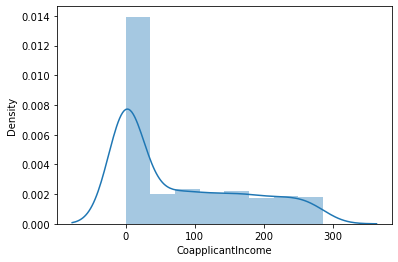

In [46]:
sns.distplot(df_new['CoapplicantIncome'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

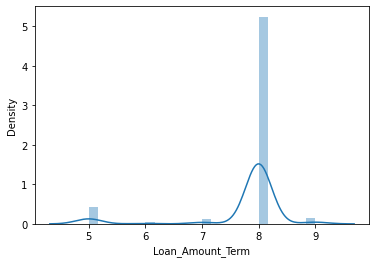

In [47]:
sns.distplot(df_new['Loan_Amount_Term'])

<AxesSubplot:xlabel='Gender', ylabel='Density'>

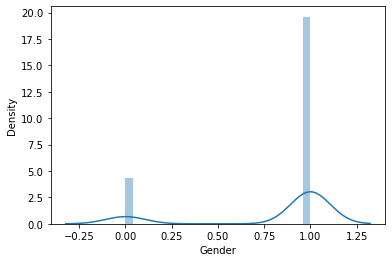

In [48]:
sns.distplot(df_new['Gender'])

<AxesSubplot:xlabel='Married', ylabel='Density'>

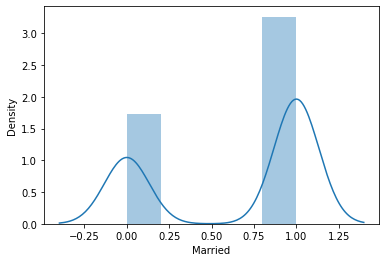

In [49]:
sns.distplot(df_new['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

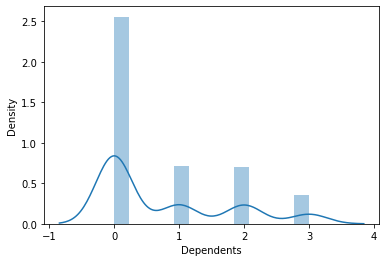

In [50]:
sns.distplot(df_new['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='Density'>

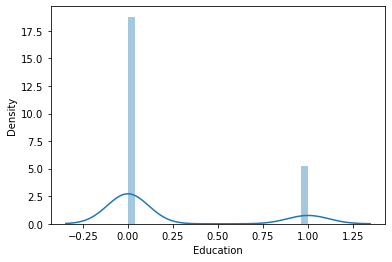

In [51]:
sns.distplot(df_new['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='Density'>

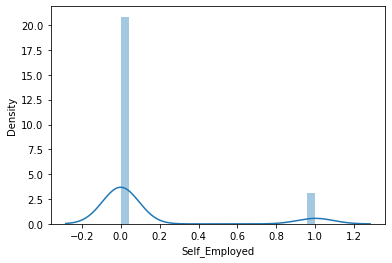

In [52]:
sns.distplot(df_new['Self_Employed'])

In [53]:
x=df_new.drop('Loan_Status',axis=1)
y-df_new['Loan_Status']

0      0
1      0
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    0
Name: Loan_Status, Length: 602, dtype: int32

In [54]:
y.value_counts()

1    413
0    189
Name: Loan_Status, dtype: int64

shows the output dataset is imbalanced so need to balance and x varaibles need to do scaling

In [55]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")

In [56]:
x

array([[ 0.88723791, -1.07639095, -0.19730723, ..., -0.52738187,
        -0.38865361,  1.19599758],
       [ 0.47392089,  0.59012055, -0.01651551, ..., -0.52738187,
        -0.38865361, -1.3449695 ],
       [-0.66249036, -1.07639095, -1.49596803, ..., -0.52738187,
         2.57298526,  1.19599758],
       ...,
       [ 1.19530786, -0.53832181,  1.52071147, ..., -0.52738187,
        -0.38865361,  1.19599758],
       [ 1.14577336, -1.07639095,  0.99914867, ..., -0.52738187,
        -0.38865361,  1.19599758],
       [ 0.47392089, -1.07639095,  0.0928072 , ..., -0.52738187,
         2.57298526,  0.01073718]])

In [57]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
x=mn.fit_transform(x)
x

array([[0.81521468, 0.        , 0.53123483, ..., 0.        , 0.        ,
        1.        ],
       [0.70590462, 0.708437  , 0.56721414, ..., 0.        , 0.        ,
        0.        ],
       [0.40535764, 0.        , 0.27278871, ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.89669002, 0.22873414, 0.87313725, ..., 0.        , 0.        ,
        1.        ],
       [0.88358962, 0.        , 0.76934118, ..., 0.        , 0.        ,
        1.        ],
       [0.70590462, 0.        , 0.58897042, ..., 0.        , 1.        ,
        0.53353965]])

In [58]:
print(x.shape)
print(y.shape)

(602, 11)
(602,)


In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [60]:

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(481, 11)
(481,)
(121, 11)
(121,)


In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
smt=SMOTE()
x_train, y_train = smt.fit_resample(x_train, y_train)

In [63]:
x_train

array([[0.95250663, 0.99729318, 0.94746711, ..., 0.        , 0.        ,
        0.53353965],
       [0.82276796, 0.        , 0.67914809, ..., 0.        , 0.        ,
        1.        ],
       [0.94401607, 0.        , 0.79081348, ..., 0.        , 0.        ,
        0.53353965],
       ...,
       [0.76693664, 0.83094832, 0.81890183, ..., 0.64561092, 0.        ,
        0.53353965],
       [0.60016909, 0.89186211, 0.67433921, ..., 0.        , 0.        ,
        0.        ],
       [0.15076755, 0.92051615, 0.51099622, ..., 0.        , 0.        ,
        1.        ]])

In [64]:
y_train

0      0
1      1
2      0
3      0
4      0
      ..
645    0
646    0
647    0
648    0
649    0
Name: Loan_Status, Length: 650, dtype: int32

In [65]:
y_train.value_counts()

1    325
0    325
Name: Loan_Status, dtype: int64

In [66]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,f1_score

In [67]:
print(lm.fit(x_train,y_train))
print(lm.score(x_train,y_train))

LogisticRegression()
0.7184615384615385


In [68]:
pred=lm.predict(x_test)
print("predicted result score:",pred)
print("actual score:",y_test)

predicted result score: [1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 1]
actual score: 113    1
426    0
578    1
79     1
185    1
      ..
347    1
152    0
504    1
446    1
149    1
Name: Loan_Status, Length: 121, dtype: int32


In [69]:
print("Accuracy_score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('F1 score',f1_score(y_test,pred,average='micro'))

Accuracy_score: 0.8429752066115702
[[14 19]
 [ 0 88]]
              precision    recall  f1-score   support

           0       1.00      0.42      0.60        33
           1       0.82      1.00      0.90        88

    accuracy                           0.84       121
   macro avg       0.91      0.71      0.75       121
weighted avg       0.87      0.84      0.82       121

F1 score 0.8429752066115702


Hyper tuning of Logistic Classifier

In [70]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lm_cv=GridSearchCV(lm,grid,cv=10)
lm_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",lm_cv.best_params_)
print("accuracy :",lm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.72


After hyper tuning logistic regression is from 70 to 71 

In [71]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [72]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [73]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print(f.score(x_train,y_train))
    print('Accuracy::',accuracy_score(y_test,pred))
    print('confusion matrix\n',confusion_matrix(y_test,pred)) 
    print('classification report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred,average='micro'))

In [74]:
fun(svc)

0.7676923076923077
Accuracy:: 0.7933884297520661
confusion matrix
 [[14 19]
 [ 6 82]]
classification report
               precision    recall  f1-score   support

           0       0.70      0.42      0.53        33
           1       0.81      0.93      0.87        88

    accuracy                           0.79       121
   macro avg       0.76      0.68      0.70       121
weighted avg       0.78      0.79      0.78       121

F1 score 0.7933884297520661


In [75]:
fun(dtc)

1.0
Accuracy:: 0.6528925619834711
confusion matrix
 [[19 14]
 [28 60]]
classification report
               precision    recall  f1-score   support

           0       0.40      0.58      0.48        33
           1       0.81      0.68      0.74        88

    accuracy                           0.65       121
   macro avg       0.61      0.63      0.61       121
weighted avg       0.70      0.65      0.67       121

F1 score 0.6528925619834711


In [76]:
fun(knn)

0.8323076923076923
Accuracy:: 0.6528925619834711
confusion matrix
 [[19 14]
 [28 60]]
classification report
               precision    recall  f1-score   support

           0       0.40      0.58      0.48        33
           1       0.81      0.68      0.74        88

    accuracy                           0.65       121
   macro avg       0.61      0.63      0.61       121
weighted avg       0.70      0.65      0.67       121

F1 score 0.6528925619834711


In [77]:
from sklearn.model_selection import GridSearchCV
params = {"criterion":['gini','entropy'],"splitter":['best','random'],"max_features":['auto', 'sqrt', 'log2']}
grid_search_cv = GridSearchCV(dtc,param_grid=params)
grid_search_cv.fit(x,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

{'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'random'}
DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       splitter='random')
0.720922865013774


Decision Tree is hyper tuning is 73.7%

In [78]:
params={'kernel':['linear','rbf','poly','sigmoid']}
grid_search_cv = GridSearchCV(svc,param_grid=params,cv=10,verbose=1,n_jobs=-1)
grid_search_cv.fit(x,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
{'kernel': 'linear'}
SVC(kernel='linear')
0.8106284153005465


SVC hyper tuning is 81.7%

In [79]:
from sklearn.model_selection import GridSearchCV
params = {"n_neighbors":[7,5,11],"weights":['uniform','distance'],"algorithm":['auto', 'brute']}
grid_search_cv = GridSearchCV(knn,param_grid=params)
grid_search_cv.fit(x,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)

{'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=11)
0.8106887052341598


In [80]:
# Random Forest CLassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

In [81]:
rf=RandomForestClassifier(n_estimators=100,random_state=4)
ad=AdaBoostClassifier()

In [82]:
fun(ad)

0.8292307692307692
Accuracy:: 0.8429752066115702
confusion matrix
 [[20 13]
 [ 6 82]]
classification report
               precision    recall  f1-score   support

           0       0.77      0.61      0.68        33
           1       0.86      0.93      0.90        88

    accuracy                           0.84       121
   macro avg       0.82      0.77      0.79       121
weighted avg       0.84      0.84      0.84       121

F1 score 0.8429752066115702


In [83]:
fun(rf)

1.0
Accuracy:: 0.8512396694214877
confusion matrix
 [[17 16]
 [ 2 86]]
classification report
               precision    recall  f1-score   support

           0       0.89      0.52      0.65        33
           1       0.84      0.98      0.91        88

    accuracy                           0.85       121
   macro avg       0.87      0.75      0.78       121
weighted avg       0.86      0.85      0.84       121

F1 score 0.8512396694214878


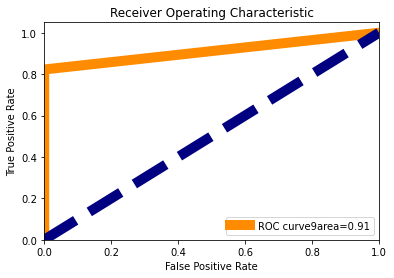

In [84]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve9area=%0.2f' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [85]:
#cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [86]:
for i in range(2,10):
    score=cross_val_score(lm,x,y,cv=i)
    print('At Value of',i,score.mean())

At Value of 2 0.8106312292358804
At Value of 3 0.8106716417910448
At Value of 4 0.8090286975717439
At Value of 5 0.8106887052341598
At Value of 6 0.8106765676567657
At Value of 7 0.8106312292358803
At Value of 8 0.8106798245614035
At Value of 9 0.810719131614654


In [87]:
score=cross_val_score(lm,x,y,cv=10)
score.mean()

0.8106284153005465

In [88]:
score=cross_val_score(dtc,x,y,cv=10)
score.mean()

0.712568306010929

In [89]:
score=cross_val_score(svc,x,y,cv=10)
score.mean()

0.8106284153005465

In [90]:
score=cross_val_score(rf,x,y,cv=10)
score.mean()

0.7957377049180328

In [91]:
score=cross_val_score(ad,x,y,cv=10)
score.mean()

0.7956830601092896

As per my model rf and lm giving good results,rf accuracy is good compare to lm

In [92]:
#Saving Model

In [93]:
import pickle
filename="loan_application.pkl"
pickle.dump(rf,open(filename,'wb'))

In [94]:
import numpy as np
a=np.array(y_test)
predicted=np.array(ad.predict(x_test))
df_com=pd.DataFrame({'orginal':a,'predicted':predicted},index=range(len(a)))

In [95]:
df_com

,orginal,predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
116,1,1
117,0,1
118,1,1
119,1,1


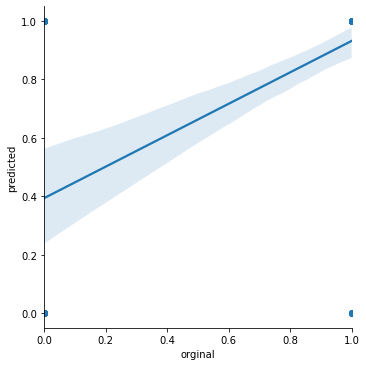

In [96]:


sns.lmplot(x='orginal',y='predicted',data=df_com)